In [21]:
import glob
import matplotlib
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import LoadDataset as LD
import numpy as np
import scipy.misc
from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

In [11]:
# Hyperparameters
batch_size = 5
num_classes = 2
epochs = 3

In [12]:

load_data = LD.LoadData('/Users/mdabdulkadir/WS1819/ADAI/data') # give the directory address.
X_dat ,Y_dat = load_data.generate_data_2cls(['c0', 'c1'])

X_dat, Y_dat = load_data.shuffle_data(X_dat,Y_dat)

Dataset directory added
['.DS_Store', 'c7', 'c0', 'c9', 'c8', 'c1', 'c6', 'c3', 'c4', 'c5', 'c2']
c0  directory images are fetched!!! 
c1  directory images are fetched!!! 


In [14]:
X = np.array(X_dat)
Y = np.array(Y_dat)
X.shape

(4756, 227, 227, 3)

In [15]:
(x_train, y_train) = (X[0:3000], Y[0:3000])
(x_test, y_test) = (X[3000:], Y[3000:])
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print(img_height, img_width, channel)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)

227 227 3
(3000, 227, 227, 3)


In [16]:
# AlexNet Define the Model
model_parmeters ={'number_kernel_conv_1':96,
                  'number_kernel_conv_2': 100, 
                  'number_kernel_conv_3':100,
                 'number_kernel_conv_4':100,
                 'number_kernel_conv_5':100,
                  'number_kernel_conv_6':100,
                 'number_kernel_conv_7':100,
                 'param_in_1_fully_connected':10000,
                 'param_in_2_fully_connected':10000,
                 'param_in_3_fully_connected':10000,
                 'param_in_4_fully_connected':10000,
                 'param_in_5_fully_connected':10000,
                 'dropout_1_f_layer':0.2,
                 'dropout_1_f_layer':0.4,
                 'dropout_1_f_layer':0.3,
                 'dropout_1_f_layer':0.3}
model = Sequential()
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='valid', input_shape=(img_height, img_width, channel,)))
# for original Alexnet
model.add(Conv2D(5, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(20, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
# print the model summary
model.summary()

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the Model
#Preprocessing of images 

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",
                               monitor='val_acc',
                               verbose=1,
                               save_best_only= True)



history = model.fit(x_train, y_train,
                              batch_size = batch_size,
                              epochs=epochs,
                              callbacks=[checkpointer],
                              verbose=1,
                              validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 114, 114, 5)       140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 57, 57, 5)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 57, 57, 5)         20        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 57, 57, 20)        2520      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 3)         543       
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


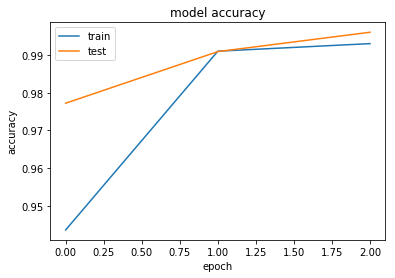

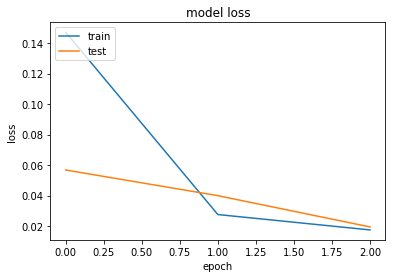

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019442610729433773
Test accuracy: 0.9960136674259681
